In [ ]:
!python --version

Python 3.7.10


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
filghtData=pd.read_csv('/content/gdrive/My Drive/DSC672/DATA/data_scaled.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
filghtData.columns

Index(['TaxiOuttimeMinutes', 'DelayCarrierMinutes', 'DelayWeatherMinutes',
       'DelayNationalAviationSystemMinutes', 'DelaySecurityMinutes',
       'DelayLateAircraftArrivalMinutes', 'city', 'time', 'maxtempC',
       'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination',
       'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph',
       'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'TailNumber', 'DestinationAirport',
       'DeparturedelayMinutes'],
      dtype='object')

In [ ]:
x=filghtData.drop(['maxtempC','mintempC','totalSnow_cm','sunHour', 'uvIndex', 'moon_illumination','DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph','cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility','winddirDegree', 'windspeedKmph','DeparturedelayMinutes'],axis=1)
y=filghtData['DeparturedelayMinutes']
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.30, random_state=55000)

In [ ]:
gnModel=GaussianNB()

In [ ]:
x_dAirport=X_train.DestinationAirport

In [ ]:
x_TaiNumber=X_train.TailNumber

In [ ]:
X_train=X_train.drop(['DestinationAirport','TailNumber'],axis=1)

In [ ]:
gnModel.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred=gnModel.predict(X_train)

In [ ]:
from sklearn import metrics
print("Accuracy",metrics.accuracy_score(y_train,y_pred))

Accuracy 0.9370877936673494


In [ ]:
xtest_dAirport=X_val.DestinationAirport

In [ ]:
xtest_tailNumber=X_val.TailNumber

In [ ]:
X_val=X_val.drop(['DestinationAirport','TailNumber'],axis=1)

In [ ]:
yPredTest=gnModel.predict(X_val)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print("Accuracy",metrics.accuracy_score(y_val,yPredTest))

Accuracy 0.9378211475324405


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_val,yPredTest))
print(classification_report(y_val,yPredTest))

[[311553   6114]
 [ 17749  48364]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    317667
           1       0.89      0.73      0.80     66113

    accuracy                           0.94    383780
   macro avg       0.92      0.86      0.88    383780
weighted avg       0.94      0.94      0.94    383780



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gradBoost = GradientBoostingClassifier()

In [ ]:
gradBoost.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
yPredictTrainGB = gradBoost.predict(X_train)
print(metrics.accuracy_score(y_train, yPredictTrainGB))

0.9494944644584058


In [ ]:
yPredictTestGB = gradBoost.predict(X_val)
print('Accuracy',metrics.accuracy_score(y_val, yPredictTestGB))

Accuracy 0.9499791547240607


In [ ]:
print(confusion_matrix(y_val, yPredictTestGB))
print(classification_report(y_val, yPredictTestGB))

[[315827   1840]
 [ 17357  48756]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    317667
           1       0.96      0.74      0.84     66113

    accuracy                           0.95    383780
   macro avg       0.96      0.87      0.90    383780
weighted avg       0.95      0.95      0.95    383780



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
sklearn.__version__

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
import math
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.svm import SVR

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=10, n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predrf1 = rf.predict(X_train)

In [ ]:
predrf2 = rf.predict(X_val)

In [ ]:
metrics.accuracy_score(y_true=y_train,y_pred=predrf1)

0.9489506256937573

In [ ]:
metrics.accuracy_score(y_true=y_val,y_pred=predrf2)

0.9491844285788733

In [ ]:
print(confusion_matrix(y_val, predrf2))
print(classification_report(y_val, predrf2))

[[315875   1792]
 [ 17710  48403]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    317667
           1       0.96      0.73      0.83     66113

    accuracy                           0.95    383780
   macro avg       0.96      0.86      0.90    383780
weighted avg       0.95      0.95      0.95    383780



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier(learning_rate=0.1,max_depth=10)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predxgb1 = xgb.predict(X_train)
predxgb2 = xgb.predict(X_val)

In [ ]:
metrics.accuracy_score(y_true=y_train,y_pred=predxgb1)

0.9516821033494661

In [ ]:
metrics.accuracy_score(y_true=y_val,y_pred=predxgb2)

0.9515008598676324

In [ ]:
print(confusion_matrix(y_val,predxgb2))
print(classification_report(y_val,predxgb2))

[[316042   1625]
 [ 16988  49125]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    317667
           1       0.97      0.74      0.84     66113

    accuracy                           0.95    383780
   macro avg       0.96      0.87      0.91    383780
weighted avg       0.95      0.95      0.95    383780



In [ ]:
X_train.columns

Index(['TaxiOuttimeMinutes', 'DelayCarrierMinutes', 'DelayWeatherMinutes',
       'DelayNationalAviationSystemMinutes', 'DelaySecurityMinutes',
       'DelayLateAircraftArrivalMinutes', 'city', 'time'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
def classification_models(X_train, y_train, X_val, y_val, hp = False, RandomForest = False, SVC_RBF = False, SVC_linear = False, SVC_polynomial = False, DT = False, AdaBoost = False):
  """
Returns the model accuracy on train and validation data. Plots the confusion matrix and print classification reprt.
      
      Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set
                  hp (boolean): Set true to fit model with best parameters
                  RandomForest: Set true to fit the RandomForest model
                  SVC_RBF:  Set true to fit the RBF kernel SVC model
                  SVC_linear: Set true to fit the Linear kernel SVC model
                  SVC_polynomial: Set true to fit the Polynomial kernel SVC model
                  DT: Set true to fit the Decision tree model
                  AdaBoost: Set true to fit the AdaBoost model
  """
  if(hp == False):
    if (RandomForest == True):
      model = RandomForestClassifier()    # Fit default RandomForest model
      model.fit(X_train, y_train)
    elif (SVC_RBF == True):
      model = SVC(kernel ='rbf')          # Fit default RBF kernel SVC model
      model.fit(X_train, y_train)
    elif (SVC_linear == True):
      model = SVC(kernel ='linear')       # Fit default Linear kernel SVC model
      model.fit(X_train, y_train)
    elif (SVC_polynomial == True):
      model = SVC(kernel ='poly')         # Fit default Polynomial kernel SVC model
      model.fit(X_train, y_train)
    elif (DT == True):
      model = DecisionTreeClassifier()    # Fit default Decision tree model
      model.fit(X_train, y_train)
    elif (AdaBoost == True):              # Fit default AdaBoost model
      model = AdaBoostClassifier()
      model.fit(X_train, y_train)

  else:
    if (RandomForest == True):
      max_depth_input = int(input('Enter max_depth: '))
      min_samples_split_input = int(input('Enter min_samples_split: '))
      
      # Fit the RandomForest model with best parameters
      model = RandomForestClassifier(max_depth = max_depth_input, min_samples_split = min_samples_split_input)
      model.fit(X_train, y_train)   
    elif (DT == True):
      max_depth_input = int(input('Enter max_depth: '))
      min_samples_split_input = int(input('Enter min_samples_split: '))

      # Fit the RandomForest model with best parameters
      model = DecisionTreeClassifier(max_depth = max_depth_input, min_samples_split = min_samples_split_input)
      model.fit(X_train, y_train)
    elif (AdaBoost == True):
      learning_rate_input = float(input('Enter Optimal learning rate: '))

      # Fit the AdaBoost classifier with optimal learning rate
      model = AdaBoostClassifier(n_estimators=100, learning_rate=learning_rate_input)
      model.fit(X_train, y_train)
    else:
      C_input = int(input('Enter optimal C value: '))
      # Fit the SVC kernels with optimal C value
      if (SVC_RBF == True):
        model = SVC(kernel ='rbf', C = C_input)
        model.fit(X_train, y_train)
      elif (SVC_linear == True):
        model = SVC(kernel ='linear', C = C_input)
        model.fit(X_train, y_train)
      elif (SVC_polynomial == True):
        model = SVC(kernel ='poly', C = C_input)
        model.fit(X_train, y_train)


  model_pred_train = model.predict(X_train)  # Predict and calculate accuracy on train data
  print('Accuracy score of train data: ', metrics.accuracy_score(y_true = y_train, y_pred = model_pred_train))
  print('\n')

  model_pred_test = model.predict(X_val)    # Predict and calculate accuracy on validation data
  print('Accuracy score of test data: ', metrics.accuracy_score(y_true = y_val, y_pred = model_pred_test))
  print('-------------------------------------------------------------------------------------------------------------------')

  #Confusion matrix
  confusion_matrix =  pd.crosstab(index=y_val, columns=model_pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
  sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
  print(confusion_matrix)
  plt.title("Confusion Matrix for test data", fontsize = 15)
  plt.show()

  # Print classification report
  print('Classification report of default Random forest model: ')
  print(metrics.classification_report(y_val, model_pred_test))



def RandomForest_Hypermarameter(X_train, y_train, X_val, y_val):
  """
  Computes the optimal max_depth and min_samples_split and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set
  """
  RF_hp = RandomForestClassifier()
  parameters = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [8,10,12,14,16,20]
  }
  GSC = GridSearchCV(RF_hp, parameters, scoring = 'precision', n_jobs = -1)
  GSC.fit(X_train, y_train)
  print('Best parameters of RandomForest model: ', GSC.best_params_)
  classification_models(X_train, y_train, X_val, y_val, hp = True, RandomForest = True)


def SVC_Hypermarameter(X_train, y_train, X_val, y_val, RBF = False, linear = False, polynomial = False):
  """
  Computes the optimal C value and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set
                  RBF (Boolean): Set to True to perform hyperparameter tuning on RBF kernel SVC model
                  linear (Boolean): Set to True to perform hyperparameter tuning on linear kernel SVC model
                  polynomial (Boolean): Set to True to perform hyperparameter tuning on polynomial kernel SVC model

  """
  selected = input('Select one of the three SVC models (RBF, Linear and Polynomial): ')
  print('Selected SVC_{} model for hyperparameter tuning'.format(selected))
  print('\n')
  if (RBF == True):
    svc = SVC(kernel ='rbf')
  elif (linear == True):
    svc = SVC(kernel ='linear')
  elif (polynomial == True):
    svc = SVC(kernel ='poly')
  parameters = {
    'C': [0.01, 0.1, 5]
  }
  GSC = GridSearchCV(svc, parameters, scoring = 'precision', n_jobs = -1)
  GSC.fit(X_train, y_train)
  print('Best parameters for SVC_{}: {}'.format(selected, GSC.best_params_))
  
  if (RBF == True):
    classification_models(X_train, y_train, X_val, y_val, hp = True, SVC_RBF = True)
  elif (linear == True):
    classification_models(X_train, y_train, X_val, y_val, hp = True, SVC_linear = True)
  else:
    classification_models(X_train, y_train, X_val, y_val, hp = True, SVC_polynomial = True)


def Decision_Tree_model_hp(X_train, y_train, X_val, y_val):
  """
  Computes the optimal max_depth and min_samples_split and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

  """
  DT_hp = DecisionTreeClassifier()
  parameters = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [8,10,12,14,16,20]
  }
  GSC = GridSearchCV(DT_hp, parameters, scoring = 'precision', n_jobs = -1)
  GSC.fit(X_train, y_train)
  print('Best parameters of Decision Trees model: ', GSC.best_params_)
  classification_models(X_train, y_train, X_val, y_val, hp = True, DT = True)


def AdaBoost_model_hp(X_train, y_train, X_val, y_val):
  """
  Computes the optimal learning rate and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

  """
  AB_hp = AdaBoostClassifier()
  parameters = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1]
}
  GSC = GridSearchCV(AB_hp, parameters, scoring = 'precision', n_jobs = -1)
  GSC.fit(X_train, y_train)
  print('Best parameters of AdaBoost model: ', GSC.best_params_)
  classification_models(X_train, y_train, X_val, y_val, hp = True, AdaBoost = True)

Accuracy score of train data:  0.9611641053014788


Accuracy score of test data:  0.9464979936421909
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          314571   3096
1           17437  48676


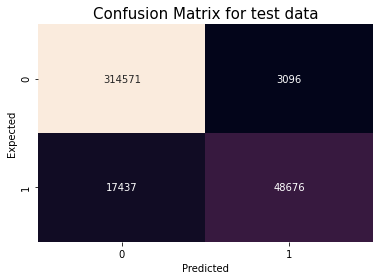

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    317667
           1       0.94      0.74      0.83     66113

    accuracy                           0.95    383780
   macro avg       0.94      0.86      0.90    383780
weighted avg       0.95      0.95      0.94    383780



In [ ]:
classification_models(X_train, y_train, X_val, y_val, hp = False, DT = True)

Accuracy score of train data:  0.9467317188655099


Accuracy score of test data:  0.9471025066444317
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          315407   2260
1           18041  48072


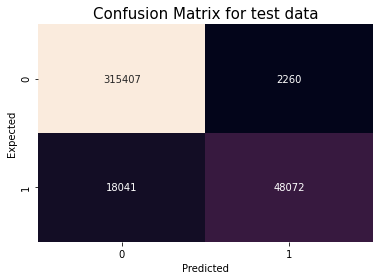

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    317667
           1       0.96      0.73      0.83     66113

    accuracy                           0.95    383780
   macro avg       0.95      0.86      0.90    383780
weighted avg       0.95      0.95      0.94    383780



In [ ]:
classification_models(X_train, y_train, X_val, y_val, hp = False, AdaBoost = True)

Best parameters of Decision Trees model:  {'max_depth': 8, 'min_samples_split': 12}
Enter max_depth: 8
Enter min_samples_split: 12
Accuracy score of train data:  0.9495123318510842


Accuracy score of test data:  0.9498123925165459
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          316345   1322
1           17939  48174


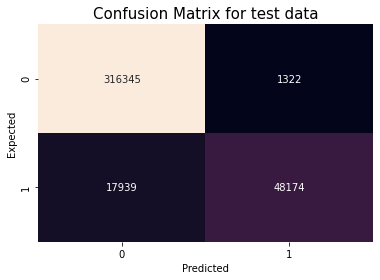

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    317667
           1       0.97      0.73      0.83     66113

    accuracy                           0.95    383780
   macro avg       0.96      0.86      0.90    383780
weighted avg       0.95      0.95      0.95    383780



In [ ]:
Decision_Tree_model_hp(X_train, y_train, X_val, y_val)

Best parameters of AdaBoost model:  {'learning_rate': 0.1}
Enter Optimal learning rate: 0.1
Accuracy score of train data:  0.9437020790944806


Accuracy score of test data:  0.9441581114179999
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          315658   2009
1           19422  46691


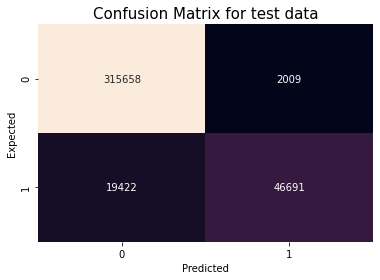

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    317667
           1       0.96      0.71      0.81     66113

    accuracy                           0.94    383780
   macro avg       0.95      0.85      0.89    383780
weighted avg       0.94      0.94      0.94    383780



In [ ]:
AdaBoost_model_hp(X_train, y_train, X_val, y_val)

Best parameters of RandomForest model:  {'max_depth': 10, 'min_samples_split': 8}
Enter max_depth: 10
Enter min_samples_split: 8
Accuracy score of train data:  0.9501667251079302


Accuracy score of test data:  0.9503647923289384
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          316448   1219
1           17830  48283


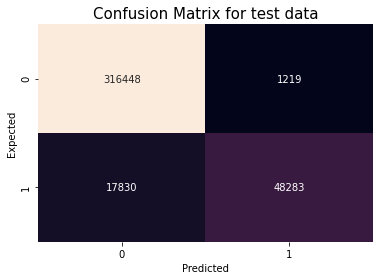

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    317667
           1       0.98      0.73      0.84     66113

    accuracy                           0.95    383780
   macro avg       0.96      0.86      0.90    383780
weighted avg       0.95      0.95      0.95    383780



In [ ]:
RandomForest_Hypermarameter(X_train, y_train, X_val, y_val)